<a href="https://colab.research.google.com/github/SudeepSarkar/sarkar-computer-vision-lectures/blob/with-class-edits/CV_Module_3_1_3_2_3_3_Linear_Filtering_and_Edges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(c) 2021, 2022, Sudeep Sarkar, University of South Florida, Tampa

Linear filtering, an essential operation done on the image for various purposes, reduces noise, sharpens features, and emphasizes certain features such as edges and corners. 

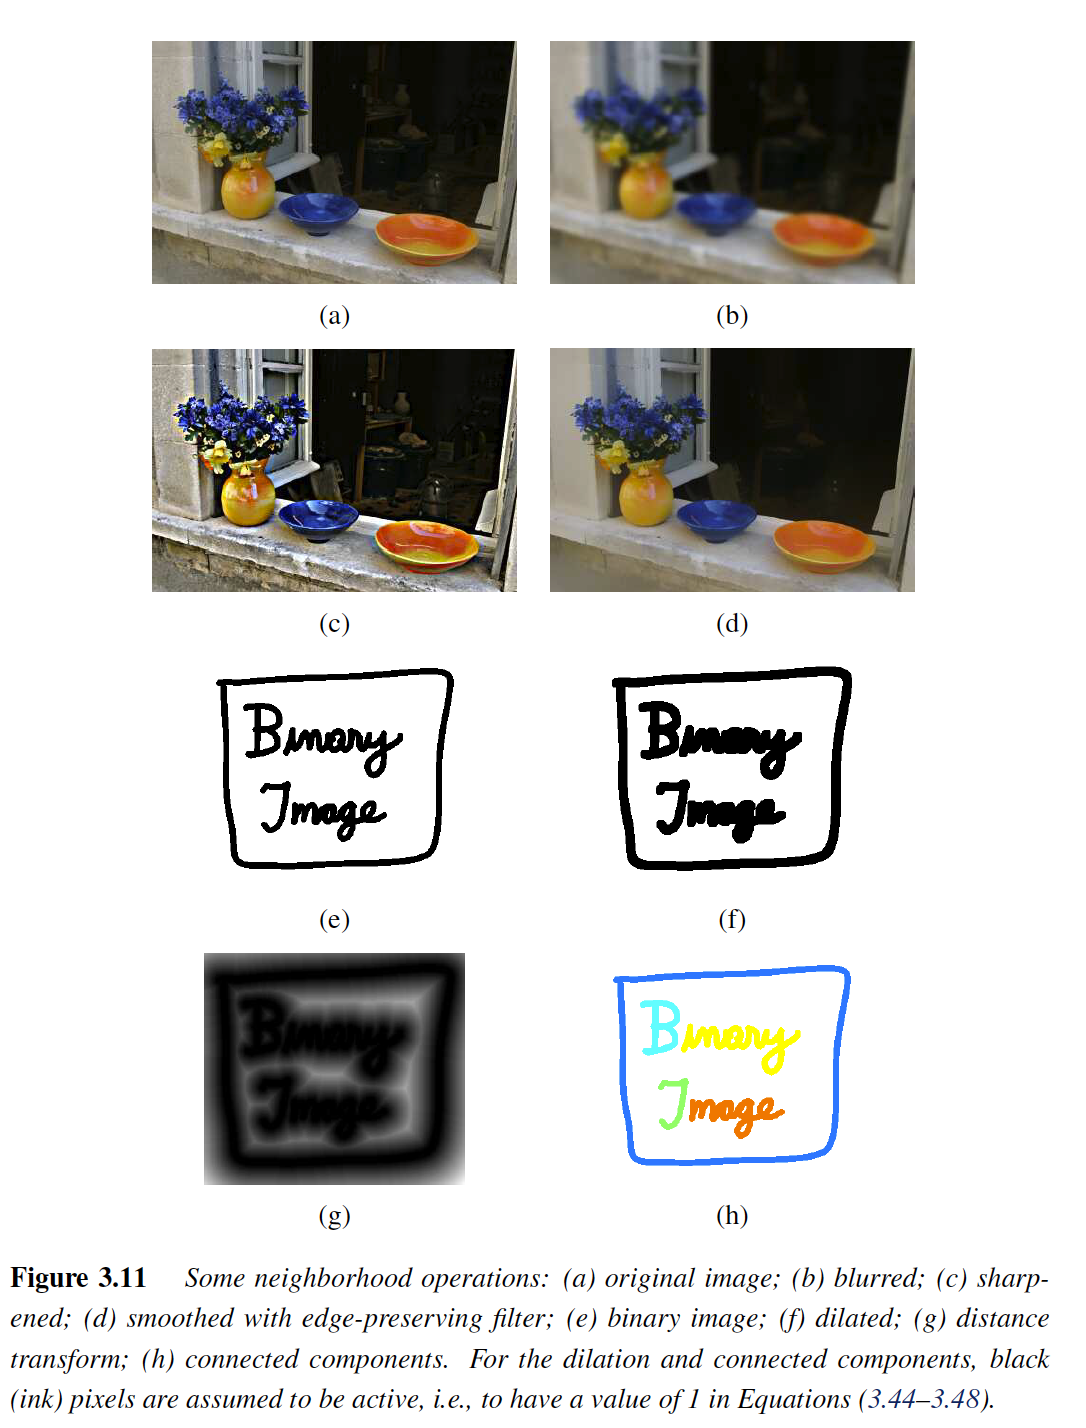

The above figure is from the textbook Computer Vision: Algorithms and Applications 2nd Edition Richard Szeliski - (c) 2022 Springer

# Module 3.1 - ID Gaussian filtering

## You will learn about

* Different aspects of linear filtering: Correlation, convolutions, step functions, Gaussian filter, scale, the first derivative of a Gaussian, the second derivative of a Gaussian, and the difference of Gaussians.

* Mathematical properties of convolutions, namely linearity, shift-invariant, commutative property, and differentiation operation. These operations simplify the computer implementation of convolution.

* Mathematical representation of intensity edges in terms of step functions and their linear filtering with Gaussian derivatives. 

* How to approximate Gaussian derivative filters with more computationally efficient versions, namely the Difference of Gaussian, Laplacian of Gaussian, and repeated convolutions.

## Correlation

* You will learn about two fundamental forms of linear filtering called **correlation** and **convolution** and how they differ. First, we look at correlation.


* **Reading**: Section 3.2, correlation, convolution, Gaussian smoothing, 2D filtering using 1D filters.

* The most common filtering version is the weighted sum of neighboring pixels. This operation is called a **correlation** (also referred to as **cross corrrelation** in signal processing), given by: 

\begin{eqnarray}
g(i,j) = f \otimes h & = & \sum_{k} \sum_{l} h(k, l) f(i+k, j+l) 
\end{eqnarray}


* The function $h(i,j)$ is called a filter, mask, or kernel. 

* Place the filter at a location, multiply, and then add to get the value. 

* Equivalently, shift the image, keeping the filter fixed, and then multiply and add. However, you have to pay attention to the signs of the indices.  

\begin{eqnarray}
g(i,j) = f \otimes h & = & \sum_{k} \sum_{l} h(k, l) f(i+k, j+l) \\ 
          & = & \sum_{r} \sum_{s} h(r-i, s-j) f(r, s)  \hspace{0.5in} \text{substituting  } r = i+k, s = j+l
\end{eqnarray}

* Note that correlation (or cross-correlation) is **not** *commutative*. 
    * $ h \otimes f \neq f \otimes h$

* **What happens at the boundaries?**



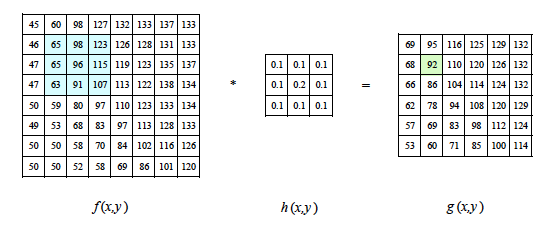

The above figure is from the textbook Computer Vision: Algorithms and Applications 2nd Edition Richard Szeliski - (c) 2022 Springer

## Code: Correlation

In [1]:
import numpy as np
h = np.array([[-1, 1],[-1, 1]])
f = np.zeros((10,10))
f[3:8,3:8] = np.ones((5, 5)) #block assignment of values

print("Image f=\n", f, "\nFilter/Kernel h=\n", h)
#--------------------------------------------------------
# We use the below function so that we do not have to worry about indexing out of bounds
# We can also adjust how we want to fix the out of array bounds issue, which can
# be done my returning zero as in the following case or returning the boundary value
# which might be appropriate in certain conditions.
def my_array_ref (a, i, j):
    if ((i >= 0) & (i < a.shape [0]) & (j >= 0) & (j < a.shape [1])):
        return a[i, j]
    else :
        return 0
#print(my_array_ref(f, -2, 3), my_array_ref(h, 0, 0))
#--------------------------------------------------------

g = np.zeros((10, 10)) #output array
for i in range(f.shape[0]) :
    for j in range (f.shape[1]):
        prod_sum = 0.0
        for k in range (h.shape[0]) :
            for l in range (h.shape[1]) :
                prod_sum = prod_sum + my_array_ref(h, k, l) * my_array_ref(f, i+k, j+l)
        g[i, j] = prod_sum

print("Output computed by moving the h over f=\n", g)

#--------------------------------------------------------

g = np.zeros((10, 10)) #output array
for i in range(f.shape[0]) :
    for j in range (f.shape[1]):
        prod_sum = 0.0
        for r in range (i, i + h.shape[0]) :
            for s in range (j, j + h.shape[1]) :
                prod_sum = prod_sum + my_array_ref(h, r-i, s-j) * my_array_ref(f, r, s)
        g[i, j] = prod_sum

print("Output computed by moving the f over h=\n", g)


Image f=
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 
Filter/Kernel h=
 [[-1  1]
 [-1  1]]
Output computed by moving the h over f=
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0. -2.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0. -2.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0. -2.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0. -2.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
Output computed by moving the f over h=
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0. 

## Assignment - correlation

1. Compute $ (1 - f) \otimes h$, with $h$ and $f$ as specified above.

2. Change the `my_array_ref` so that instead of returning zero when the index is out of bounds, it should return the boundary value, i.e., for f(-2, 3) and f (2, 15), it should return f(0, 3) and f(2, 9), respectively.

3. Re-compute $ (1 - f) \otimes h$, with $h$ and $f$ as specified above, but using this new `my_array_ref` function.

4. Compare the output obtained in step 3 above with that in step 1.

## Convolution

* The **convolution** operation flips the filter about the origin and then correlates with the image function. The "flip" is around the "origin" of the kernel. In the example above, *the origin was the (0,0) entry of the kernel matrix. However, the origin can be other locations, such as the center of the mask. 

* Flipping does not affect circularly symmetric kernels, so convolution is the same as a correlation for symmetric kernels.

* Mathematically, the convolution operations are given by    

\begin{eqnarray}
f \star h & = & \sum_{k, l} h(k, l) f(i - k, j - l)  \\
& = & \sum_{r, s} h(i - r, j - s) f(r, s)  \hspace{0.5in} \text{substituting  } r = i-k, s = j-l \\
& = & h \star f 
\end{eqnarray}

* Convolution is commutative! This was not true for correlation.

* Convolution is an essential mathematical operation in signal processing, with many favorable properties, and plays a crucial role in modeling electrical circuit signals. If you are interested, you can look up an MIT such as [signal processing lecture](https://ocw.mit.edu/resources/res-6-007-signals-and-systems-spring-2011/video-lectures/lecture-4-convolution/) for a fuller treatment of this topic.



## Code: Convolution

In [2]:
print("Image f=\n", f, "\nKernel h=\n", h)


g = np.zeros((10, 10))
for i in range(f.shape[0]) :
    for j in range (f.shape[1]):
        prod_sum = 0.0
        for k in range (h.shape[0]) :
            for l in range (h.shape[1]) :
                prod_sum = prod_sum + my_array_ref(h, k, l) * my_array_ref(f, i-k, j-l)
        g[i, j] = prod_sum

print("Output =\n", g)

Image f=
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 
Kernel h=
 [[-1  1]
 [-1  1]]
Output =
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0. -2.  0.  0.  0.  0.  2.  0.]
 [ 0.  0.  0. -2.  0.  0.  0.  0.  2.  0.]
 [ 0.  0.  0. -2.  0.  0.  0.  0.  2.  0.]
 [ 0.  0.  0. -2.  0.  0.  0.  0.  2.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [3]:
import scipy.ndimage as scimage

g = scimage.convolve( f, h, mode='reflect', origin=(0,0))

print("Using scipy convolve. Compare with previous. \n", g)

Using scipy convolve. Compare with previous. 
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0. -2.  0.  0.  0.  0.  2.  0.  0.]
 [ 0.  0. -2.  0.  0.  0.  0.  2.  0.  0.]
 [ 0.  0. -2.  0.  0.  0.  0.  2.  0.  0.]
 [ 0.  0. -2.  0.  0.  0.  0.  2.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


## Assignment - Impulse Response

1. Let $f(i,j)$ be a zero-valued array with only one non-zero entry at the center equal to 1, i.e., the input is a unit impulse. 

2. What is the convolution of this function with any kernel?  This response is called the **impulse response**.

## 2D Convolution implemented as a single matrix multiply, without for-loops

see https://github.com/alisaaalehi/convolution_as_multiplication


## Properties of the convolution operations

1. **Convolution is a linear operation**: Convolution of the sum of two images is the sum of each of their convolution. The convolution of a scaled version of an image is the scaled version of the convolution of the image.

\begin{equation}
         h \star (a f_1 + f_2) = a (h \star f_1) + (h \star f_2)
\end{equation}

2. Convolution is a **shift-invariant operation** since the filter is the *same for each shift*.  So, convolution is a linear, shift-invariant (LSI) operation.
    
3. **Continuous version**

\begin{eqnarray}
        f \star h & = & \int_u \int_v f (u, v) h(x-u, y-v) du dv \\
        h \star f  & = & \int_u \int_v h(u, v) f (x-u, y-v) du dv 
\end{eqnarray}
    
4. **Derivative of a convolution** is the convolution with the derivative
\begin{eqnarray}
        \frac{\partial}{\partial x} f \star h & = & \int_u \int_v  f (u, v) \left ( \frac{\partial}{\partial x} h(x-u, y-v) \right ) 
         du dv \\
         & = & \int_u \int_v  f (u, v) h_x(x-u, y-v)  du dv 
\end{eqnarray}

## Filtering with 1D Gaussian-shaped filters. 
* Consider just one-dimensional filtering for now. Let the filter be
    
\begin{equation}
        h(x) = \frac{1}{\sqrt{2 \pi} \sigma} \exp - \frac{x^2}{2 \sigma^2}
\end{equation}
    
* And let the "image" be a **step function** $s(x)$. A step function is a good abstraction of intensity changes in images. Intensity changes usually accompany object boundaries. Hence, intensity changes are a good indicator that objects are present. Thus, their importance.

\begin{equation}
        s(x) = \left \{ \begin{array}{l r}
                    1 & x \ge 0 \\
                    0 & x < 0 
                \end{array} \right .
\end{equation}
    
* The convolution $g(x) = s(x) \star h(x) $ will smooth the sharp edge.

\begin{eqnarray}
        s(x) \star h(x) &  = & \int_u s(u) h (x - u) du \\
        & = & \int_{u=0}^{\infty} h (x - u) du \\
        & = & \int_{v=-\infty}^{x} h (v) dv
\end{eqnarray}
    
* The derivative of the output $\frac{d}{dx} g(x) $ is a Gaussian function. 

\begin{eqnarray}
        \frac{d}{dx} g(x)  &  = & \frac{d}{dx} \int_{v=-\infty}^{x} h (v) dv \\
               & = & h(x)
\end{eqnarray}

* This operation is equivalent to convolution with a derivative of a Gaussian function. You can verify this, i.e., $s(x) \star h'(x) = h(x)$ by doing the convolution mathematically. Use integration by parts in the derivation.

\begin{eqnarray}
        h'(x) & = & \frac{d}{dx} \left (\frac{1}{\sqrt{2 \pi} \sigma} \exp - \frac{x^2}{2 \sigma^2} \right )\\
              & = &  - \frac{x}{\sqrt{2 \pi} \sigma^3} \exp - \frac{x^2}{2 \sigma^2}
\end{eqnarray}

* We can use this operation, i.e., convolution with a Gaussian followed by a derivative or convolution with a derivative of a Gaussian function for "edge" detection. The point of maximum marks the edge. 

* Using the first derivative of a Gaussian by marking the local maxima in response is the optimal method for detecting object boundaries based on intensity. 


## Code: 1D Gaussian convolutions

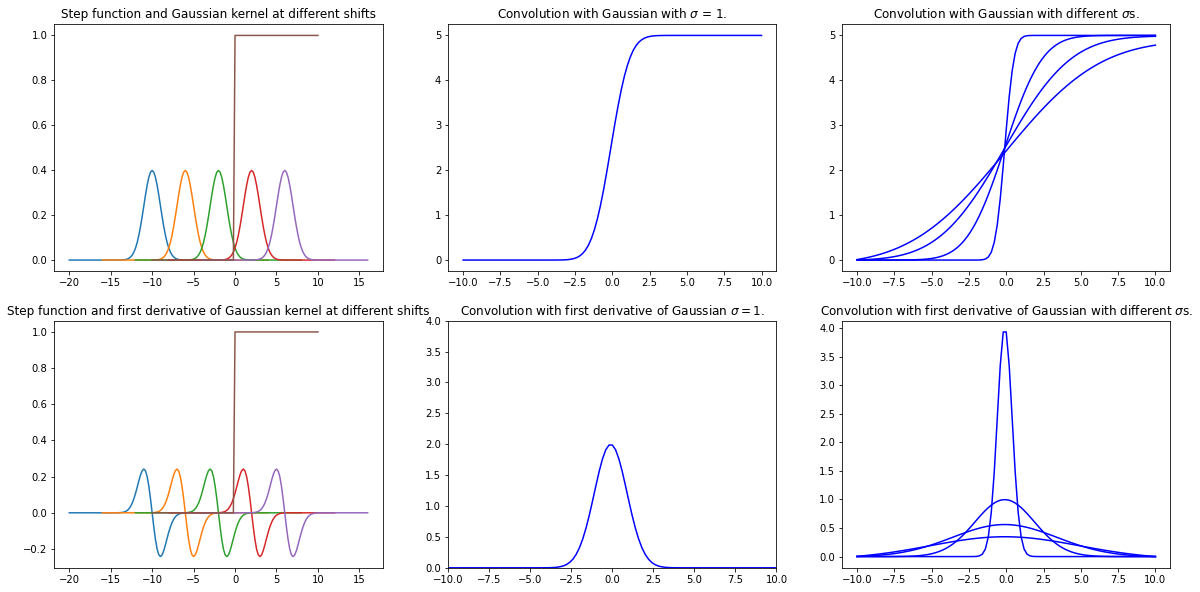

In [4]:
import matplotlib.pyplot as plt

t = np.linspace(-10, 10, 101)

def s(x) : # Step function
    return(np.ones(x.shape)*np.greater_equal(x, 0))

def gaussian (x, sigma):
    return (np.exp(-(x**2/(2*sigma*sigma)))*(1/(np.sqrt(2*np.pi)*sigma)))

def first_derivative_of_gaussian (x, sigma):
    return (np.exp(-(x**2/(2*sigma*sigma)))*(-x/(np.sqrt(2*np.pi)*sigma**3)))

#--------------------------------------------------------

plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
for i in range (-10, 10, 4) :
  plt.plot(t+i, gaussian(t, 1))
plt.plot(t, s(t))
plt.title('Step function and Gaussian kernel at different shifts')

plt.subplot(2, 3, 2)
plt.plot(t, scimage.convolve(s(t), gaussian(t, 1)), 'b')
plt.title('Convolution with Gaussian with $\sigma$ = 1.')


plt.subplot(2, 3, 3)
for sigma in np.linspace(0.5, 5, 4):
    plt.plot(t, scimage.convolve(s(t), gaussian(t, sigma)), 'b')
plt.title('Convolution with Gaussian with different $\sigma$s.')

plt.subplot(2,3, 4)
for i in range (-10, 10, 4) :
  plt.plot(t+i, first_derivative_of_gaussian(t, 1))
plt.plot(t, s(t))
plt.title('Step function and first derivative of Gaussian kernel at different shifts')


plt.subplot(2, 3, 5)
plt.plot(t, scimage.convolve(s(t), first_derivative_of_gaussian(t, 1)), 'b')
plt.title('Convolution with first derivative of Gaussian $\sigma = 1$.')
plt.axis([-10, 10, 0, 4])

plt.subplot(2, 3, 6)
for sigma in np.linspace(0.5, 5, 4):
    plt.plot(t, scimage.convolve(s(t), first_derivative_of_gaussian(t, sigma)), 'b')
plt.title('Convolution with first derivative of Gaussian with different $\sigma$s.');



## Code: Noise reduction with Gaussian filter

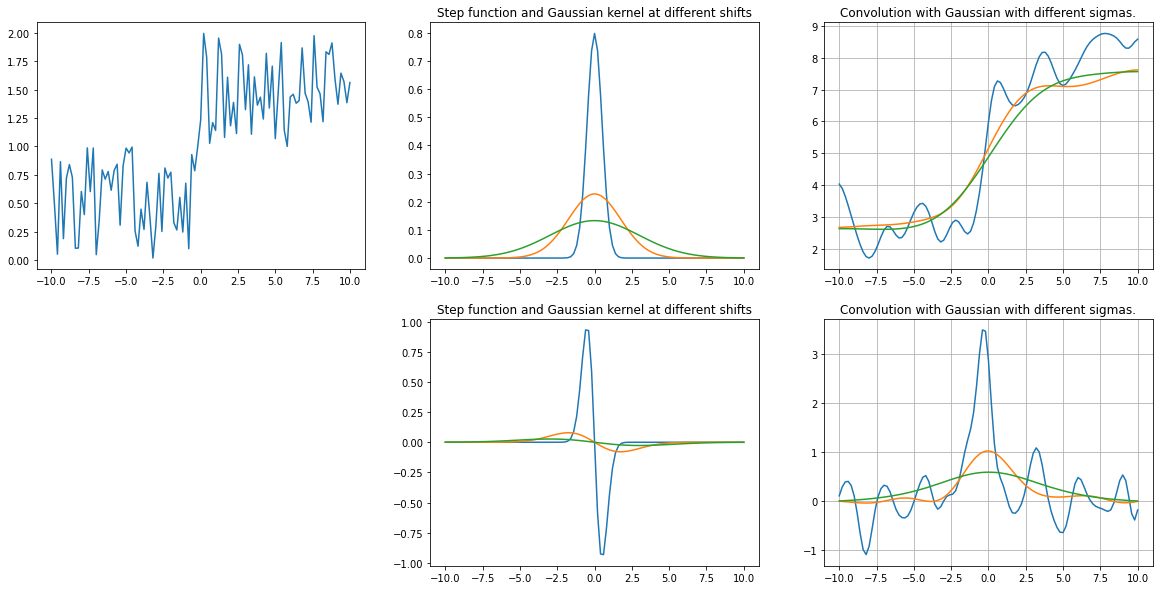

In [5]:
import matplotlib.pyplot as plt

t = np.linspace(-10, 10, 101)

def noisy_s(x) : # Step function
    return(np.ones(x.shape)*np.greater_equal(x, 0) + np.random.rand(x.shape[0]))

def gaussian (x, sigma):
    return (np.exp(-(x**2/(2*sigma*sigma)))*(1/(np.sqrt(2*np.pi)*sigma)))

def first_derivative_of_gaussian (x, sigma):
    return (np.exp(-(x**2/(2*sigma*sigma)))*(-x/(np.sqrt(2*np.pi)*sigma**3)))
#--------------------------------------------------------

plt.figure(figsize=(20,10))
plt.subplot(2, 3, 1)
plt.plot(t, noisy_s(t))

plt.subplot(2, 3, 2)
for sigma in np.linspace(0.5, 3, 3):
  plt.plot(t, gaussian(t, sigma))
plt.title('Step function and Gaussian kernel at different shifts')

plt.subplot(2, 3, 3)
for sigma in np.linspace(0.5, 3, 3):
    plt.plot(t, scimage.convolve(noisy_s(t), gaussian(t, sigma)))
plt.title('Convolution with Gaussian with different sigmas.')
plt.grid()

plt.subplot(2, 3, 5)
for sigma in np.linspace(0.5, 3, 3):
  plt.plot(t, first_derivative_of_gaussian(t, sigma))
plt.title('Step function and Gaussian kernel at different shifts')

plt.subplot(2, 3, 6)
for sigma in np.linspace(0.5, 3, 3):
    plt.plot(t, scimage.convolve(noisy_s(t), first_derivative_of_gaussian(t, sigma)))
plt.title('Convolution with Gaussian with different sigmas.')
plt.grid()


## Assignment

We will study the response to pure noise of an edge detector based on first derivative of a Gaussian. How many edges will be marked for a signal that is pure noise.

1. Create an input 1D noise vector of length 100 with random values between 0 and 1.
2. Compute the convolution of this vector with the first derivative of a Gaussian with a specified $\sigma$.
3. Detect "edges" by marking the maxima in the output of step 2
4. Count the number of edges marked.
5. Plot the number of edges marked vs. $\sigma$ for $\sigma$ at 0.5, 0.7, 1.0, 1.2, 1.5, 1.7. 2.0, 2.5, and 3.0
6. Comment on the nature of the plot.


## Second derivative of a 1D Gaussian

* Taking another derivative produces a **zero-crossing ** at the edge location. The overall operation is equivalent to convolution with a second derivative of a Gaussian.

\begin{eqnarray}
        h''(x) & = &  \frac{d}{dx} \left ( - \frac{x}{\sqrt{2 \pi} \sigma^3} \exp - \frac{x^2}{2 \sigma^2} \right ) \\
        & = & - \frac{1}{\sqrt{2 \pi} \sigma^3} \exp - \frac{x^2}{2 \sigma^2} + \frac{x^2}{\sqrt{2 \pi} \sigma^5} \exp - \frac{x^2}{2 \sigma^2} \\
        & = & - \frac{1}{\sqrt{2 \pi} \sigma^3} 
        \left (1 - \frac{x^2}{\sigma^2} \right ) 
        \exp - \frac{x^2}{2 \sigma^2} 
\end{eqnarray}




## Code: Second derivative of Gaussian

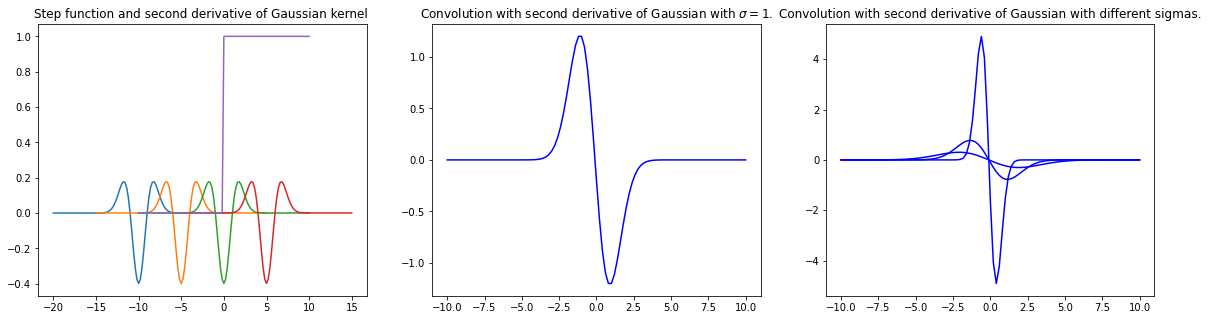

In [6]:
def second_derivative_of_gaussian (x, sigma):
    return (np.exp(-(x**2/(2*sigma*sigma)))*(-(1 - x*x/(sigma*sigma))/(np.sqrt(2*np.pi)*sigma**3)))

#--------------------------------------------------------

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
for i in range (-10, 10, 5) :
  plt.plot(t+i, second_derivative_of_gaussian(t, 1))
plt.plot(t, s(t))
plt.title('Step function and second derivative of Gaussian kernel ')

plt.subplot(1, 3, 2)
plt.plot(t, scimage.convolve(s(t), second_derivative_of_gaussian(t, 1)), 'b')
plt.title('Convolution with second derivative of Gaussian with $\sigma = 1$.')

plt.subplot(1, 3, 3)
for sigma in np.linspace(0.5, 2, 3):
    plt.plot(t, scimage.convolve(s(t), second_derivative_of_gaussian(t, sigma)), 'b')
plt.title('Convolution with second derivative of Gaussian with different sigmas.');


## Assignment: Difference of Gaussian (DoG)

Interestingly, the second derivative of a Gaussian has a very similar shape to the difference of two Gaussians (DoG) of different scales, $h_{\sigma_1}(x) - h_{\sigma_2}(x)$.

Find values of $\sigma_1$ and $\sigma_2$ for which the DoG is most similar to the second derivative of Gaussian of $\sigma = 3$. Plot the functions.

## Approximations to 1D Gaussian filtering

* Consider the following bar-shaped kernel (with unit area)

\begin{equation}
    r(x) = \left \{ \begin{array}{l r}
            \frac{1}{2w} & -w \le x \le w \\
            0 & \text{elsewhere} 
           \end{array} \right .
\end{equation}

* What is $r(x) \star r(x)$?

* Repeated convolution of a function $f(x)$ with $r(x)$ will be denoted by 
\begin{equation}
r(x) \star (r(x) \star (r(x) \star f(x))).
\end{equation} 
Due to the linearity of the convolution operation, this repeated convolution can be associated in the following manner 
\begin{equation}
(r(x) \star (r(x) \star (r(x))))\star f(x),
\end{equation} 
i.e. first repeatedly convolve the kernel with itself then convolve with the function at the end.

* So, what is the shape of $r(x) \star r(x) \star \cdots r(x)$?


## Code: Repeated convolution of a kernel shape

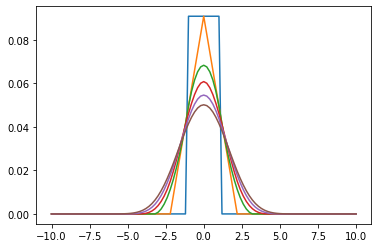

In [7]:
# repeated convolution with a bar shaped kernel results in a Gaussian shape
def r (x, w) :
    z = np.ones(x.shape[0])*np.less_equal(np.abs(x), w)
    return(z/np.sum(z))

plt.plot (t, r(t, 1))
h = r(t, 1)
for i in range(5) :
    h = scimage.convolve(h, r(t,1), origin = 0)
    plt.plot(t, h)

* What happens if you do not normalize the kernel to have a unit area under it?

* These kernels can be bar-shaped, for instance. They can be a set of random kernels of limited with, and we will end up with a Gaussian-like shape!

* If we convolve two Gaussian kernels of widths $\sigma_1$ and $\sigma_2$, we will end up with a Gaussian kernel of width $\sigma_1 + \sigma_2$. 

* So, in the limiting case of repeated convolutions of a bar kernel, we will end up with a Gaussian kernel, of course, with a width proportional to the number of it repeated.

* This information is relevant in deep learning networks, especially those very deep, using small kernels at each layer. They all effectively end up with variations of different Gaussian kernels if we operate in the non-saturation zone of the non-linear (sigmoid) function. This observation is just my conjecture, and it remains to be validated. 


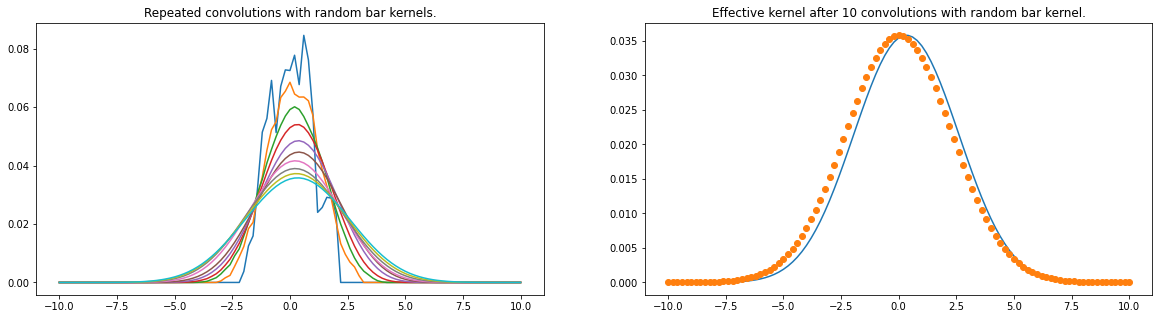

In [8]:
# repeated convolutions of random bar shaped kernels also results in a Gaussian shape
def r (x, w) :
    z = (np.random.rand(x.shape[0])) *np.less_equal(np.abs(x), w)
    return(z/z.sum())

h = r(t, 1)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)

for i in range(10) :
    h = scimage.convolve(h, r(t, 1), origin = 0)
    plt.plot(t, h)
plt.title ('Repeated convolutions with random bar kernels.')
plt.subplot(1,2,2)
plt.plot(t, h)
g = gaussian(t, 2.3)
g = g*h.max()/g.max()
plt.plot(t, g, 'o')
plt.title('Effective kernel after 10 convolutions with random bar kernel.');


#Module 3.2 - 2D Gaussian filtering

## You will learn about


* 2D linear filtering via 2D convolutions using 1D convolutions of separable filters.


* How to extend the 1D filtering to 2D images using 2D Gaussian filters and their derivative, such as gradient of Gaussian and Laplacian of a Gaussian.

* Concepts learnt: separable functions, gradient magnitude and direction, Laplacian and the LoG filter.


## 2D Gaussian separable into 1D Gaussian opertations

* The 2D Gaussian kernel is given by

\begin{equation}
g(x, y) = \frac{1}{2 \pi \sigma^2} \exp -\frac{x^2 + y^2}{2 \sigma^2}
\end{equation}

* Note that the **isotropic** 2D Gaussian form used here is *separable* into products of 1D Gaussian.

\begin{equation}
g(x, y) = \left ( \frac{1}{\sqrt{2 \pi} \sigma} \exp -\frac{x^2}{2 \sigma^2} \right ) \left ( \frac{1}{\sqrt{2 \pi} \sigma} \exp -\frac{y^2}{2 \sigma^2} \right ) =  g(x) g (y)
\end{equation}

* This separable property simplifies the 2D convolution into a series of 1D convolutions. This simplification results in tremendous computation gains.

\begin{eqnarray}
g(x, y) \star f(x, y) & = & \int_u \int_v f(u, v) g(x - u) g (y - v) du dv \\
& = & \int_u \left ( \int_v f(u, v) g (y - v) dv \right ) g(x - u) dv \\
& = & (f(x, y) \star g(y)) \star g(x) 
\end{eqnarray}

* Algorithm for 2D Gaussian convolution using two pass 1D convolutions:
> 1. On the **original image**, perform 1D convolutions along the **rows** of using 1D Gaussian shape.
> 2. On the **output of step 1**, perform 1D convolutions along the **columns** using 1D Gaussian shape. 

* Note that in the steps above, all the rows (or the columns) can be processed simultaneously on specialized hardware, saving enormous amount of time.


## The gradient

* The 2D correlate of the first derivative of Gaussian is the **[gradient](https://en.wikipedia.org/wiki/Gradient)** function given by a vector of derivatives, each performed along an orthogonal direction.

\begin{eqnarray}
\nabla g(x, y) & = & \left [ \begin{array}{c} \frac{d}{dx} g(x, y) \\ \frac{d}{dy} g(x, y) \end{array} \right ] \\
& = & \left [ \begin{array}{c} 
- \frac{x}{2 \pi \sigma^4} \exp - \frac{x^2 + y^2}{2 \sigma^2} \\ 
- \frac{y}{2 \pi \sigma^4} \exp - \frac{x^2 + y^2}{2 \sigma^2} 
\end{array} \right ] \\
& = & \left [ \begin{array}{c} 
\left(- \frac{x}{\sqrt{2 \pi} \sigma^3} \exp - \frac{x^2}{2 \sigma^2} \right ) 
\left(- \frac{1}{\sqrt{2 \pi} \sigma} \exp - \frac{y^2}{2 \sigma^2} \right ) 
\\ 
\left(- \frac{1}{\sqrt{2 \pi} \sigma} \exp - \frac{x^2}{2 \sigma^2} \right ) 
\left(- \frac{y}{\sqrt{2 \pi} \sigma^3} \exp - \frac{y^2}{2 \sigma^2} \right )  
\end{array} \right ] \\
& = & \left [ \begin{array}{c} 
\left ( \frac{d}{dx} g(x) \right ) g(y)
\\ 
g(x) \left ( \frac{d}{dy} g(y) \right )
\end{array} \right ] 
\end{eqnarray}

* The algorithm for a 2D gradient of Gaussian convolution using 1D convolutions

> 1. On the **original image**, perform 1D convolutions of each **row** (x)  with 1D first derivative of Gaussian
> 2. On the **output of step 1**, perform 1D convolutions of each **column** (y) using 1D Gaussian. This will result in the 2D derivative along the rows (x), i.e., one of the components of the gradient vector.
> 3. On the **original image**, perform 1D convolutions of each **column** (y)with 1D first derivative of Gaussian.
> 4. On the **output of step 3**, perform 1D convolutions of the **rows** (x) using 1D Gaussian. This will result in the 2D derivative along the columns (y), i.e., one of the components of the gradient vector.

* Note four passes are needed, but they are all 1D convolutions and all the convolutions at each step can be performed simultaneously on specialized hardware.


## Gradient magnitude and direction

* Let the output of the convolution of the image $f(x,y)$ with the gradient, $\nabla g(x, y)$, be denoted by $\left [ \begin{array}{c} h_x(x, y) \\ h_x(x, y) \end{array} \right ]$.

\begin{equation}
\left [ \begin{array}{c} h_x(x, y) \\ 
h_y(x, y) \end{array} \right ] = 
\left [ \begin{array}{c} f(x, y) \star \frac{d}{dx} g(x, y) \\ f(x, y) \star \frac{d}{dy} g(x, y) \end{array} \right ]
\end{equation}

* This gradient image can be described in terms of its magnitude, $ \sqrt{h_x^2(x, y) + h_y^2(x, y)}$, and its direction, $\theta = \tan^{-1} \frac{h_y(x, y)}{h_x(x, y)}$. The magnitude will denote the strength of the image edge, and stronger edges will be associated with larger magnitudes. The direction, $\theta$, will denote a direction perpendicular to the edge.




## Laplacian of a Gaussian (LoG)

* The 2D equivalent of the second derivative of a Gaussian is the **Laplacian of a Gaussian** (LoG)
    
\begin{eqnarray}
        \nabla^2 h(x, y) = \frac{\partial^2}{\partial x^2} h(x, y) + 
        \frac{\partial^2}{\partial y^2} h(x, y)
\end{eqnarray}

* Neuroscientists have found this kernel or filter shape in the retina of the eyes. It was one of the earliest edge detectors proposed by [Marr and Hildreth, 1980](https://royalsocietypublishing.org/doi/abs/10.1098/rspb.1980.0020). Some refer to this filter as the Mexican hat filter. (Plot the 3D shape of the filter and see why.)

* Because of the convolution operation's linear property, we can separate the convolution with the LoG into two 1D convolutions like the other two cases.


## Code: 2D Gaussian filtering

In [9]:
def gaussian (x, sigma):
    g = np.exp(-(x**2/(2*sigma*sigma)))*(1/(np.sqrt(2*np.pi)*sigma))
    return (g/g.sum())
#------------------------------------------------------------------
def first_derivative_of_gaussian (x, sigma):
    dg = np.exp(-(x**2/(2*sigma*sigma)))*(-x/(np.sqrt(2*np.pi)*sigma**3))
    return (dg)
#------------------------------------------------------------------
def second_derivative_of_gaussian (x, sigma):
    return (np.exp(-(x**2/(2*sigma*sigma)))*(-(1 - x*x/(sigma*sigma))/(np.sqrt(2*np.pi)*sigma**3)))

#------------------------------------------------------------------
def image_convolve_gaussian (image, sigma) :
    N = np.round(3*(sigma+1))
    t = np.arange(-N, N)  # Note the width of the kernel, need to be this large to capture most of the shape
    g = gaussian(t, sigma) # 1D gaussian kernel
    # Process rows
    output = image.copy()
    for i in range (image.shape[0]):
        output[i,:] = scimage.convolve(output[i, :], g)
    # Process columns
    for j in range (image.shape[1]):
        output[:, j] = scimage.convolve(output[:, j], g)
    return (output)
#------------------------------------------------------------------
def image_convolve_gradient_gaussian (image, sigma) :
    N = np.round(3*(sigma+1))
    t = np.arange(-N, N)  # Note the width of the kernel, need to be this large to capture most of the shape
    g = gaussian(t, sigma) # 1D gaussian kernel
    dg = first_derivative_of_gaussian(t, sigma) # 1D first derivative gaussian kernel

    # Process rows
    gradX = image.copy()
    for i in range (image.shape[0]):
        gradX[i,:] = scimage.convolve(gradX[i, :], dg)
    # Process columns
    for j in range (image.shape[1]):
        gradX[:, j] = scimage.convolve(gradX[:, j], g)

    gradY = image.copy()
    for i in range (image.shape[0]):
        gradY[i,:] = scimage.convolve(gradY[i, :], g)
    # Process columns
    for j in range (image.shape[1]):
        gradY[:, j] = scimage.convolve(gradY[:, j], dg)

    return (gradX, gradY)

#------------------------------------------------------------------
def image_convolve_LoG (image, sigma) :
    N = np.round(4*(sigma+1)) # Note larger width 
    t = np.arange(-N, N)  # Note the width of the kernel, need to be this large to capture most of the shape
    g = gaussian(t, sigma) # 1D gaussian kernel
    ddg = second_derivative_of_gaussian (t, sigma) # 1D first derivative gaussian kernel
    
    # Process rows
    dXX = image.copy()
    for i in range (image.shape[0]):
        dXX[i,:] = scimage.convolve(dXX[i, :], ddg)
    # Process columns
    for j in range (image.shape[1]):
        dXX[:, j] = scimage.convolve(dXX[:, j], g)

    dYY = image.copy()
    for i in range (image.shape[0]):
        dYY[i,:] = scimage.convolve(dYY[i, :], g)
    # Process columns
    for j in range (image.shape[1]):
        dYY[:, j] = scimage.convolve(dYY[:, j], ddg)

    return (dXX+dYY)



## Example with an impulse

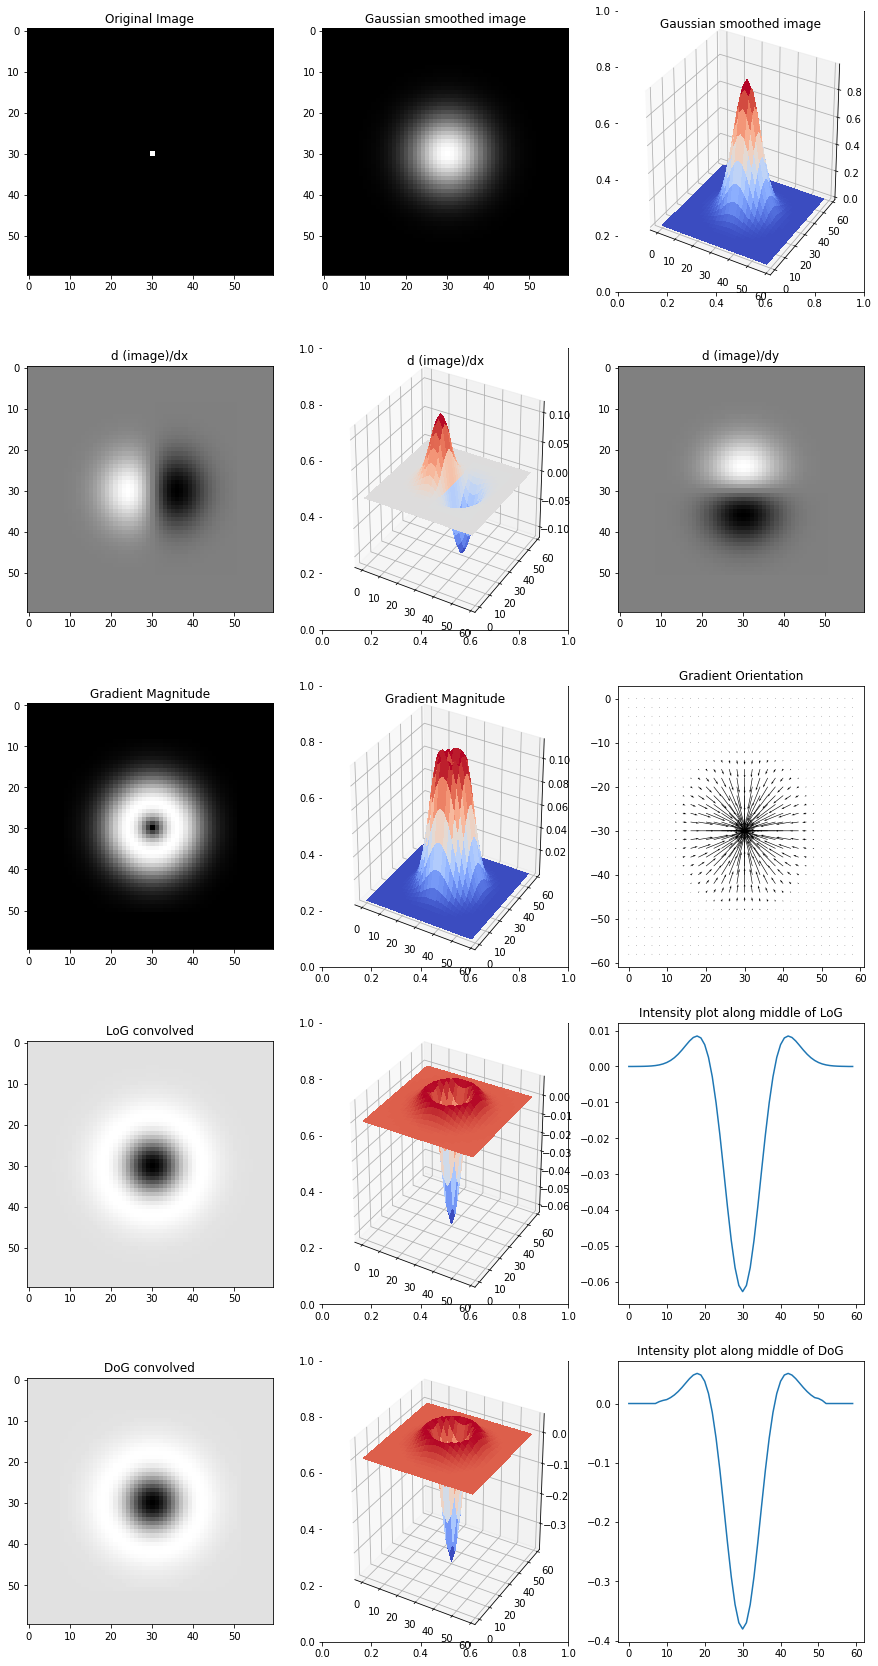

In [10]:
#------------------------------------------------------------------
img = np.zeros([60, 60]) # image with dark background and one pixel that is non-zero 
img[30, 30] = 255.0  # units pulse

#------------------------------------------------------------------

sigma = 6
# Compute gradient of Gaussian
image_dx, image_dy = image_convolve_gradient_gaussian(img, sigma)

# Compute Laplacian of Gaussian
image_log = image_convolve_LoG (img, sigma)

# Compute Difference of Gaussian
smoothed_image_1 = image_convolve_gaussian (img, sigma-0.5)
smoothed_image_2 = image_convolve_gaussian (img, sigma+0.5)
image_dog = smoothed_image_2 - smoothed_image_1


#--------------------Display ----------------------------------------
fig, axs = plt.subplots(nrows=5, ncols=3)
fig.set_size_inches (15, 30)

# Set a X, Y meshgrid to plot image as 3D surface
x = np.arange(0, image_dx.shape[1], 2)
y = np.arange(0, image_dx.shape[0], 2)
X, Y = np.meshgrid(x, y)

# Show input image
axs[0,0].imshow(img, cmap='gray')
axs[0,0].set_title ('Original Image')
axs[0,1].imshow(smoothed_image_2, cmap='gray')
axs[0,1].set_title ('Gaussian smoothed image')
ax = fig.add_subplot(5, 3, 3, projection='3d')
ax.plot_surface(X, Y, smoothed_image_2[::2,::2], rstride=1, cstride=1, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)
ax.set_title ('Gaussian smoothed image')


# Show image gradient
axs[1,0].imshow(image_dx, cmap='gray')
axs[1,0].set_title('d (image)/dx')
ax = fig.add_subplot(5, 3, 5, projection='3d')
ax.plot_surface(X, Y, image_dx[::2,::2], rstride=1, cstride=1, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)
ax.set_title('d (image)/dx')
axs[1,2].imshow(image_dy, cmap='gray')
axs[1,2].set_title('d (image)/dy');

# Show image gradient and orientation
grad_mag = np.sqrt(image_dx*image_dx + image_dy*image_dy)+0.0001
axs[2,0].imshow(grad_mag, cmap='gray')
axs[2,0].set_title('Gradient Magnitude')
# Show the gradient directions every 10th pixel otherwise it is too crowded.
ax = fig.add_subplot(5, 3, 8, projection='3d')
ax.plot_surface(X, Y, grad_mag[::2,::2], rstride=1, cstride=1, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)
ax.set_title('Gradient Magnitude')
axs[2,2].quiver(X, -Y, image_dx[::2,::2], -image_dy[::2,::2])
axs[2,2].set_title('Gradient Orientation');


# Show Laplacian of Gaussian
axs[3,0].imshow(image_log, cmap='gray')
axs[3,0].set_title('LoG convolved')
ax = fig.add_subplot(5, 3, 11, projection='3d')
ax.plot_surface(X, Y, image_log[::2,::2], rstride=1, cstride=1, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)
axs[3,2].plot(image_log[30,:])
axs[3,2].set_title('Intensity plot along middle of LoG')


# Show plots of the intensity across the middle
axs[4,0].imshow(image_dog, cmap='gray')
axs[4,0].set_title('DoG convolved')
ax = fig.add_subplot(5, 3, 14, projection='3d')
ax.plot_surface(X, Y, image_dog[::2,::2], rstride=1, cstride=1, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)
axs[4,2].plot(image_dog[30,:])
axs[4,2].set_title('Intensity plot along middle of DoG');


##Code: Example with a square patch

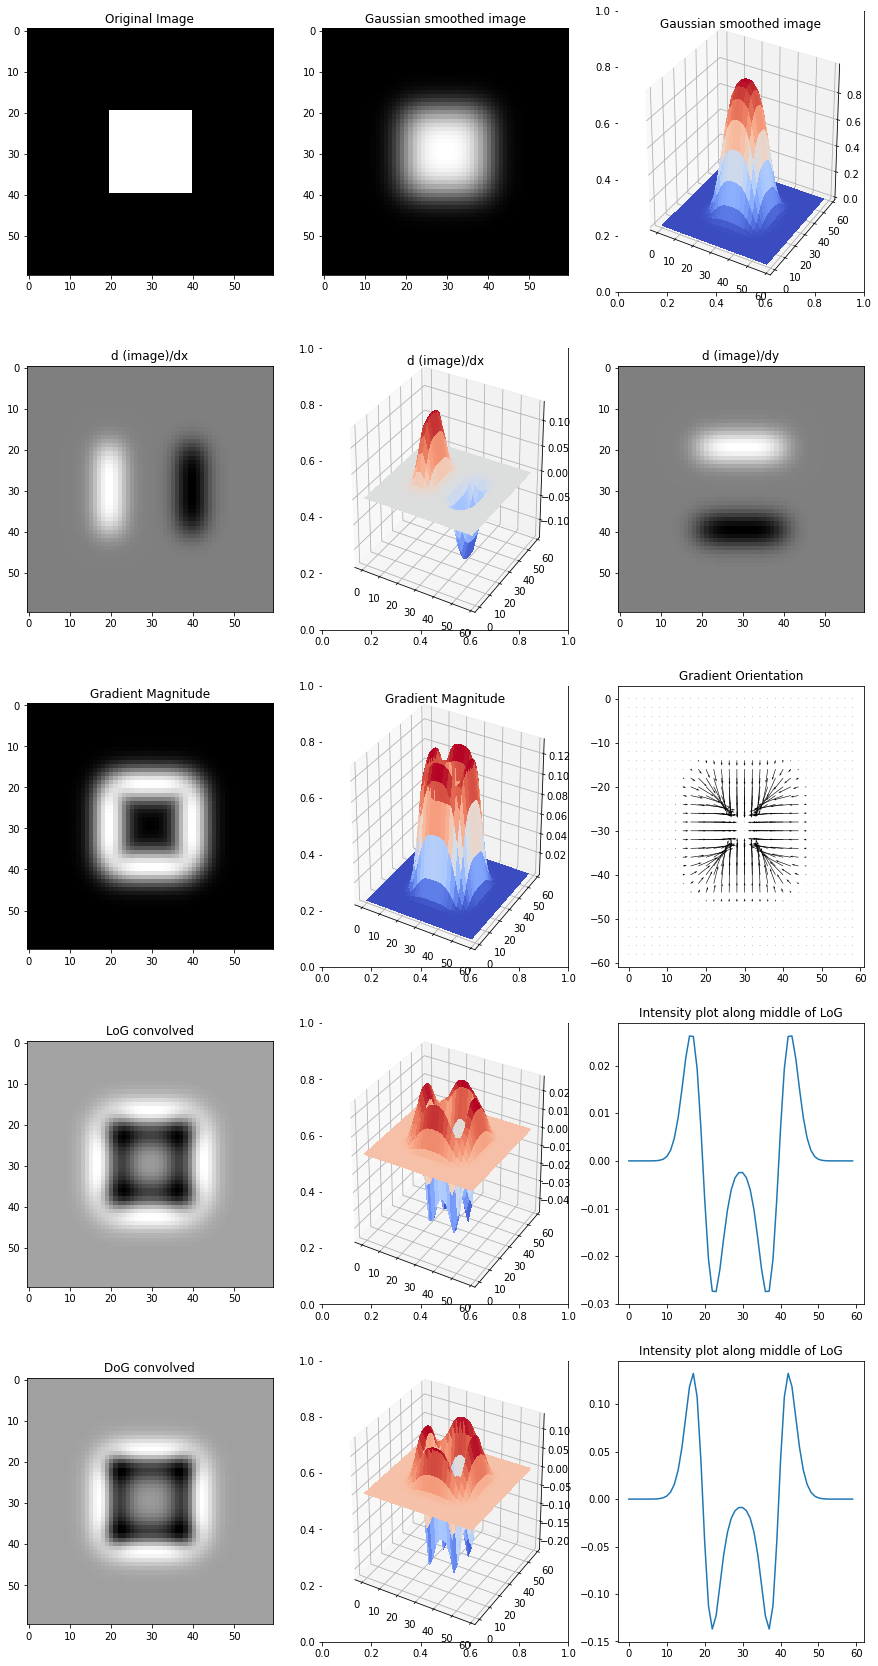

In [11]:
#------------------------------------------------------------------
img = np.zeros([60, 60]) # synthetic image of a white square 
img[20:40,20:40] = np.ones([20, 20])

#------------------------------------------------------------------

# Compute gradient of Gaussian
image_dx, image_dy = image_convolve_gradient_gaussian(img, 3)

# Compute Laplacian of Gaussian
image_log = image_convolve_LoG (img, 3)

# Computer Difference of Gaussian
smoothed_image_1 = image_convolve_gaussian (img, 2.0)
smoothed_image_2 = image_convolve_gaussian (img, 3.5)
image_dog = smoothed_image_2 - smoothed_image_1

#--------------------Display ----------------------------------------
fig, axs = plt.subplots(nrows=5, ncols=3)
fig.set_size_inches (15, 30)

# Set a X, Y meshgrid to plot image as 3D surface
x = np.arange(0, image_dx.shape[1], 2)
y = np.arange(0, image_dx.shape[0], 2)
X, Y = np.meshgrid(x, y)

# Show input image
axs[0,0].imshow(img, cmap='gray')
axs[0,0].set_title ('Original Image')
axs[0,1].imshow(smoothed_image_2, cmap='gray')
axs[0,1].set_title ('Gaussian smoothed image')
ax = fig.add_subplot(5, 3, 3, projection='3d')
ax.plot_surface(X, Y, smoothed_image_2[::2,::2], rstride=1, cstride=1, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)
ax.set_title ('Gaussian smoothed image')


# Show image gradient
axs[1,0].imshow(image_dx, cmap='gray')
axs[1,0].set_title('d (image)/dx')
ax = fig.add_subplot(5, 3, 5, projection='3d')
ax.plot_surface(X, Y, image_dx[::2,::2], rstride=1, cstride=1, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)
ax.set_title('d (image)/dx')
axs[1,2].imshow(image_dy, cmap='gray')
axs[1,2].set_title('d (image)/dy');

# Show image gradient and orientation
grad_mag = np.sqrt(image_dx*image_dx + image_dy*image_dy)+0.0001
axs[2,0].imshow(grad_mag, cmap='gray')
axs[2,0].set_title('Gradient Magnitude')
# Show the gradient directions every 10th pixel otherwise it is too crowded.
ax = fig.add_subplot(5, 3, 8, projection='3d')
ax.plot_surface(X, Y, grad_mag[::2,::2], rstride=1, cstride=1, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)
ax.set_title('Gradient Magnitude')
axs[2,2].quiver(X, -Y, image_dx[::2,::2], -image_dy[::2,::2])
axs[2,2].set_title('Gradient Orientation');


# Show Laplacian of Gaussian
axs[3,0].imshow(image_log, cmap='gray')
axs[3,0].set_title('LoG convolved')
ax = fig.add_subplot(5, 3, 11, projection='3d')
ax.plot_surface(X, Y, image_log[::2,::2], rstride=1, cstride=1, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)
axs[3,2].plot(image_log[30,:])
axs[3,2].set_title('Intensity plot along middle of LoG')


# Show plots of the intensity across the middle
axs[4,0].imshow(image_dog, cmap='gray')
axs[4,0].set_title('DoG convolved')
ax = fig.add_subplot(5, 3, 14, projection='3d')
ax.plot_surface(X, Y, image_dog[::2,::2], rstride=1, cstride=1, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)
axs[4,2].plot(image_dog[30,:])
axs[4,2].set_title('Intensity plot along middle of LoG');


## Code: Example with an real image

In [13]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/Colab Notebooks/CAP 6415 Computer Vision Online/data/'

!ls "$data_dir"

Mounted at /content/drive
 0005_Walking001.xlsx			     left01.jpg
 0008_ChaCha001.xlsx			     left02.jpg
 2011_09_26_drive_0048_sync		     left03.jpg
 2011_09_26_drive_0048_sync.zip		     left04.jpg
 20211003_082148.jpg			     left05.jpg
 20211003_082201.jpg			     left06.jpg
 apple.jpg				     left07.jpg
'Armes 1.png'				     left08.jpg
'Armes 2.png'				     left09.jpg
 blog_danforth_monica_mural_panorama.jpg     left11.jpg
 blog_monica_mural_brown_white.jpg	     left12.jpg
 blog_monica_mural_fish_tree_windows1.jpg    lizard.jpg
'cats and dogs.jpg'			     MOT16-08-raw.webm
 convenience-store-cereal01.jpg		     mountain_peak_1.png
 declaration_of_independence_stone_630.jpg   mountain_peak_2.png
 Fig3_3a.jpg				     parking_lot_meva_1.png
 Fig3_4a.jpg				     parking_lot_meva_2.png
 Fig3_4c.jpg				     parking_lot_meva_3.png
 hawaii.png				    'Road Signs Kaggle'
 house_1.png				     semper
 house_2.png				    'Superbowl 2021_1.png'
 house_facade.png			    'Superbowl 2021_2.png'
 IMG_01

In [ ]:
#------------------------------------------------------------------
from skimage import io  #has functions to read and write images
from skimage import color as change # contains function to change between color spaces

# Load an color image in grayscale
img = io.imread(data_dir + 'house_1.png')
img = change.rgb2gray(change.rgba2rgb(img))
img = img.astype(float)  # need to change type from uint8 to float

smoothed_image_1 = image_convolve_gaussian (img, 2.0)
smoothed_image_2 = image_convolve_gaussian (img, 3.5)

image_dx, image_dy = image_convolve_gradient_gaussian(img, 3)
image_log = image_convolve_LoG (img, 3)

#-------------------------------------------------------------
plt.figure(figsize=(20,30))

plt.subplot(4,2,1)
plt.imshow(img, cmap='gray')
plt.title ('Original Image')
plt.subplot(4,2,2)
plt.imshow(smoothed_image_1, cmap='gray')
plt.title ('Gaussian smoothed image')

# Show image gradient
plt.subplot(4,2,3)
plt.imshow(image_dx, cmap='gray')
plt.title('d (image)/dx')
plt.subplot(4,2,4)
plt.imshow(image_dy, cmap='gray')
plt.title('d (image)/dy');

# Show image gradient magnitude and orientation
plt.subplot(4,2,5)
grad_mag = np.sqrt(image_dx*image_dx + image_dy*image_dy)+0.0001
plt.imshow(grad_mag, cmap='gray')
plt.title('gradient magnitude')
plt.subplot(4,2,6)
# Show the gradient directions every 10th pixel otherwise it is too crowded.
x = np.arange(0, img.shape[1], 10)
y = np.arange(0, img.shape[0], 10)
X, Y = np.meshgrid(x, y)
plt.quiver(X, -Y, image_dx[::10,::10], -image_dy[::10,::10])
plt.title('gradient direction');

# Show Laplacian of Gaussian
plt.subplot(4,2,7)
plt.imshow(image_log, cmap='gray')
plt.title('LoG convolved')
plt.subplot(4,2,8)
plt.imshow(smoothed_image_2 - smoothed_image_1, cmap='gray')
plt.title('DoG convolved');

# Module 3.3 - Edge detection

## You will learn about


* Edge detection, i.e., detecting edges or boundaries in images.

* You will see how the gradient of 2D Gaussian filters can be used to detect edges in images. This edge detection method was proven optimal from a signal processing point of view and is known as the Canny edge detector, and it remains a robust way for finding boundaries in images.

* You will learn about the famous, human retina-inspired, LoG edge detector Marr and Hildreth proposed. It detects object boundaries as zero crossing of the second derivative of a Gaussian.



## 2D Edge Detection

* Edges are important, stable features of objects. They play an important rule in object recognition in both human, and artificial vision systems
> see, for example, Marr D. and Hildreth E. (1980) [Theory of edge detection](http://www.hms.harvard.edu/bss/neuro/bornlab/qmbc/beta/day4/marr-hildreth-edge-prsl1980.pdf) Proc. R. Soc. Lond. B.207: 187–217 

* This importance of edges is not surprising given that intensity changes accompany object edges. 

* However, note that **not all** intensity changes are due to object boundaries. (Can you think of some other causes for intensity changes in images?

* ([Canny, 1986](https://ieeexplore.ieee.org/abstract/document/4767851)) showed that the first derivative of a Gaussian is the optimal filter shape that maximizes:
> 1. Strength of the response.
> 2. The precision of edge localization, and
> 3. Suppresses noise to the most extent.

* Later, ([Sarkar and Boyer, 1991](https://marathon.csee.usf.edu/~sarkar/PDFs/iir-pami.pdf)) showed how this filter could efficiently be implemented using a recursive digital filter involving a fixed number of operations, irrespective of scale (sigma) and suitable for direct hardware implementation. 

* There are, of course, many variations of this derivative idea for edge detection. Many edge detectors have been proposed in the literature. See ([Heath et al., 1997](https://ieeexplore.ieee.org/abstract/document/643893)) for an evaluation of edge detectors concerning their capacity to sustain object recognition by humans.

## Industrial and medical uses of edge detection

For some industrial uses of edge detection see 

* https://www.cognex.com/products/machine-vision/vision-software/vision-tools

* https://www.keyence.com/ss/products/vision/visionbasics/basic/size/

* https://www.gehealthcare.com/products/advanced-visualization/all-applications/cardiacvx



## Canny edge detector

The process of the Canny edge detection algorithm can be broken down into five different steps:

1. Compute the gradient of a Gaussian-filtered image to reduce noise effects and to detect edges based on the magnitude and direction information
2. **Non-maxima suppression**: Detect points of *local* maxima in the magnitude image, guided by the direction information. 
3. **Optional processing**: 
> * Apply gradient magnitude thresholding or lower bound cut-off suppression to get rid of spurious response to edge detection
> * Edge chaining: Link edge pixels into lists by following pixels based on the direction estimates.  
> * Keeps chains of edges that have at least a certain percentage of edge pixels above a high magnitude threshold.


## Marking edges by non-maxima suppression of the gradient of a Gaussian filter


In [ ]:
import matplotlib.patches as patches
#------------------------------------------------------------------
img = np.zeros([60, 60]) # synthetic image of a white square 
img[20:40,20:40] = np.ones([20, 20])

# Compute gradient of Gaussian
image_dx, image_dy = image_convolve_gradient_gaussian(img, 3)
grad_mag = np.sqrt(image_dx*image_dx + image_dy*image_dy)

#------------------------------------------------------------------

plt.figure(figsize=(20,10))

ax = plt.subplot(1,2,1)
plt.imshow(grad_mag, 'gray', origin='lower', interpolation='none')
# Create a Rectangle patch
corner = (19, 18)
rect = patches.Rectangle(corner, 5, 5, linewidth=2, edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
plt.title ('Gradient magnitude and the selected 5 by 5 patch');

plt.subplot(1,2,2)
plt.imshow(grad_mag[corner[1]:corner[1]+5, corner[0]:corner[0]+5], 'gray', origin='lower', interpolation='none')
# Set a X, Y meshgrid to plot image as 3D surface
X, Y = np.meshgrid(np.arange(0, 5, 1), np.arange(0, 5, 1))

plt.quiver(X, Y, 
           image_dx[corner[1]:corner[1]+5, corner[0]:corner[0]+5], 
           image_dy[corner[1]:corner[1]+5, corner[0]:corner[0]+5], color='r');
plt.title ('Gradient magnitude and direction in a 5 by 5 patch');

## Code: Non-maxima supression code

In [15]:
#------------------------------------------------------------------
from skimage import io  #has functions to read and write images
from skimage import color as change # contains function to change between color spaces
#-------------------------------------------

def edge_detect (image, scale, threshold) :
    image_dx, image_dy = image_convolve_gradient_gaussian(image, scale)
    grad_mag = np.sqrt(image_dx*image_dx + image_dy*image_dy) + 0.00001 
    # adding a small number to avoid divide by zero in next line
    cos_t = image_dx/grad_mag
    sin_t = image_dy/grad_mag

    edgeImage = np.zeros(grad_mag.shape)
    for y in range (1,image_dx.shape[0]-1) :
        for x in range (1, image_dx.shape[1]-1) :
            if (grad_mag[y, x] > threshold) :
                fx = np.array([x + cos_t[y,x], x - cos_t[y,x]])
                fy = np.array([y + sin_t[y,x], y - sin_t[y,x]])
                values = scimage.map_coordinates(grad_mag, [fy, fx], order = 1)
                if ((grad_mag[y, x] > values[0]) and (grad_mag[y, x] > values[1])) :
                    edgeImage[y, x] = 1
    return edgeImage, grad_mag, cos_t, sin_t



## Edges of a noisy square at different scales

In [ ]:
#-------------------------------------------
img = np.zeros([60, 60]) # synthetic image of a white square 
img[20:40,20:40] = np.ones([20, 20])
img = img + 2.0* np.random.rand(img.shape[0], img.shape[1])


# Load an color image in grayscale and change it float type for further processing
#img = io.imread('/content/drive/MyDrive/Colab Notebooks/CAP 4410 - UG Computer Vision/data/house_1.png')
#img = change.rgb2gray(change.rgba2rgb(img))
#img = img.astype(float)  # need to change type from uint8 to float

#-----------------------DISPLAY------------------------------ 
fig, axs = plt.subplots(nrows=2, ncols=2)

fig.set_size_inches (20, 15)

axs[0,0].imshow(img, 'gray')
axs[0,0].set_title ('Noisy square')

edges, _, _, _ = edge_detect(img, scale=1.0, threshold = 0.1)
axs[0,1].imshow(edges, 'gray')
axs[0,1].set_title ('Edges at $\sigma = 1.0$ and threshold of 0.1.')

edges,_,_,_= edge_detect(img, scale=1.5, threshold = 0.1)
axs[1,0].imshow(edges, 'gray')
axs[1,0].set_title ('Edges at $\sigma = 1.5$ and threshold of 0.1.')

edges,_,_,_= edge_detect(img, scale=3.0, threshold = 0.1)
axs[1,1].imshow(edges, 'gray');
axs[1,1].set_title ('Edges at $\sigma = 3.0$ and threshold of 0.1.');


## Edges at different scales on a real image

* Lower scales corresponds to lower values of $\sigma$
* Lower scales localizes the edges better, however lot of noisy edges also show up.
* Higher scales rejects noise better, but detects mostly the stronger edges

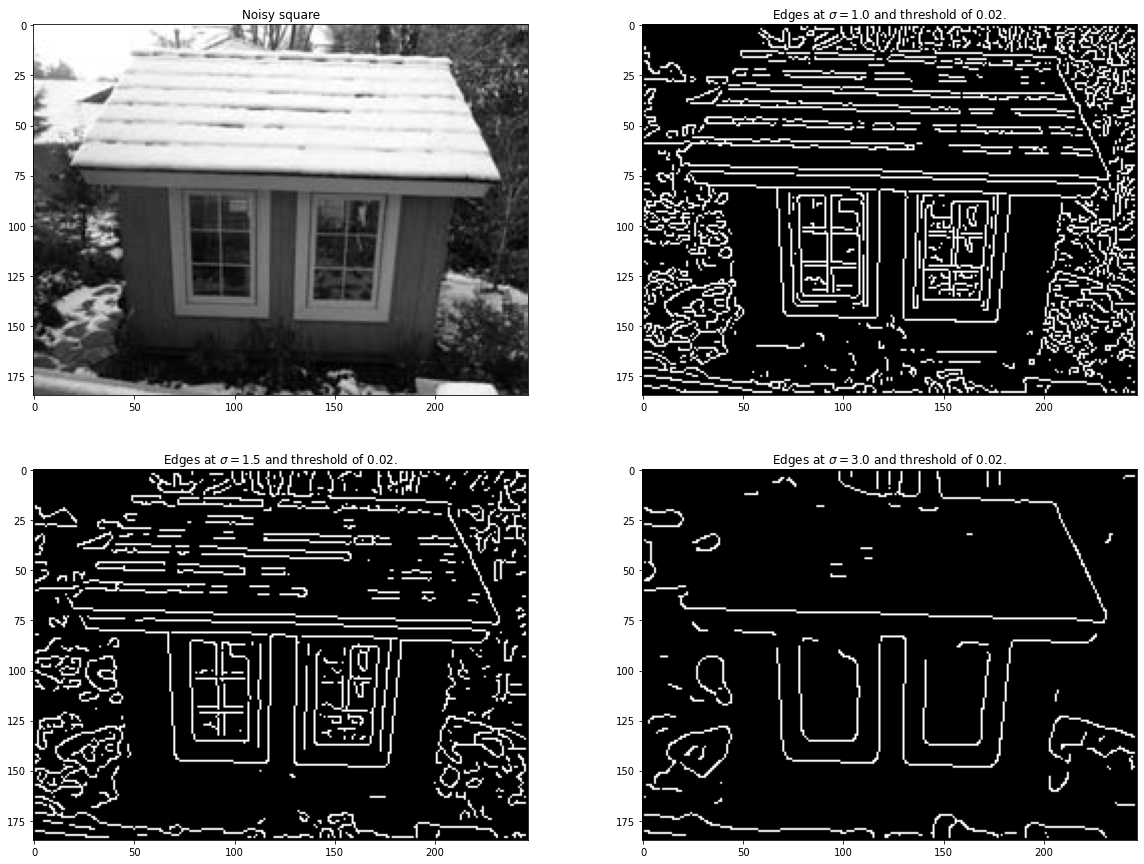

In [44]:
# Load an color image in grayscale and change it float type for further processing
img = io.imread('/content/drive/MyDrive/Colab Notebooks/CAP 4410 - UG Computer Vision/data/house_1.png')
img = change.rgb2gray(change.rgba2rgb(img))
img = img.astype(float)  # need to change type from uint8 to float

#-----------------------DISPLAY------------------------------ 
fig, axs = plt.subplots(nrows=2, ncols=2)

fig.set_size_inches (20, 15)

axs[0,0].imshow(img, 'gray')
axs[0,0].set_title ('Noisy square')

edges,_,_,_= edge_detect(img, scale=1.0, threshold = 0.02)
axs[0,1].imshow(edges, 'gray')
axs[0,1].set_title ('Edges at $\sigma = 1.0$ and threshold of 0.02.')

edges,_,_,_= edge_detect(img, scale=1.5, threshold = 0.02)
axs[1,0].imshow(edges, 'gray')
axs[1,0].set_title ('Edges at $\sigma = 1.5$ and threshold of 0.02.')

edges,_,_,_= edge_detect(img, scale=3.0, threshold = 0.02)
axs[1,1].imshow(edges, 'gray');
axs[1,1].set_title ('Edges at $\sigma = 3.0$ and threshold of 0.02.');


## OpenCV Canny edge detector in NOT the Canny edge detector!

Uses a 3 by 3 kernel (Sobel) to detect edges. It does not have a concept of scale ($\sigma$) and is technically NOT the Canny operator. Gaussian smoothing and scale are integral to the concept of Canny edges.

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(data_dir + 'house_1.png', 0)


edges = cv.Canny(img,100,200)

fig, axs = plt.subplots(nrows=1, ncols=2)

fig.set_size_inches (20, 15)

axs[0].imshow(img,cmap = 'gray')
axs[0].set_title('Original Image');

axs[1].imshow(edges, cmap = 'gray')
axs[1].set_title('Edge Image');


## Difference of Gaussian (or Laplacian of Gaussian) Edges



In [ ]:
# Load an color image in grayscale
img = io.imread('/content/drive/MyDrive/Colab Notebooks/CAP 4410 - UG Computer Vision/data/house_1.png')
img = change.rgb2gray(change.rgba2rgb(img))
img = img.astype(float)  # need to change type from uint8 to float

smoothed_image_1 = image_convolve_gaussian (img, 2.0)
smoothed_image_2 = image_convolve_gaussian (img, 3.5)
DoG = smoothed_image_2 - smoothed_image_1

# Logic to mark the edge pixels
edgeImage = np.zeros(smoothed_image_1.shape)
for y in range (1, smoothed_image_1.shape[0]) :
    for x in range (1, smoothed_image_1.shape[1]) :
        if (((DoG[y, x] * DoG[y-1, x]) < 0) or ((DoG[y, x] * DoG[y, x-1]) < 0)) :
            edgeImage[y, x] = 1

#-----------------------DISPLAY------------------------------ 
fig, axs = plt.subplots(nrows=2, ncols=2)

fig.set_size_inches (20, 15)

axs[0,0].imshow(img, 'gray')
axs[0,1].imshow(DoG, 'gray')
axs[1,0].imshow(DoG > 0, 'gray')
axs[1,1].imshow(edgeImage, 'gray');


## Connection to Deep Learning via visualization of filters --

([Zeiler and Fergus, 2014](https://cs.nyu.edu/~fergus/papers/zeilerECCV2014.pdf)) presents a visualization of the deep learning network convolutions learnt by Krizhevsky net on ImageNet. Compare them with the filters we have studied here and find the similarities.

Below are the Gaussian filters we are have studied in this lecture, visualized as images.

In [ ]:
img = np.zeros([25, 25])
img[12, 12] = 1

image_sm = image_convolve_gaussian (img, 3)
image_dx, image_dy = image_convolve_gradient_gaussian(img, 3)
image_log = image_convolve_LoG (img, 3)

# directional double derivative filters -- 
# compute gradients of the components of the gradient components
image_dx_dx, image_dx_dy = image_convolve_gradient_gaussian(image_dx, 3)
image_dy_dx, image_dy_dy = image_convolve_gradient_gaussian(image_dy, 3)

plt.subplot(2, 4, 1)
plt.imshow(image_sm, 'gray')
plt.subplot(2, 4, 2)
plt.imshow(image_dx, 'gray')
plt.subplot(2, 4, 3)
plt.imshow(image_dy, 'gray')
plt.subplot(2, 4, 4)
plt.imshow(image_log, 'gray');

plt.subplot(2, 4, 5)
plt.imshow(image_dx_dx, 'gray')
plt.subplot(2, 4, 6)
plt.imshow(image_dx_dy, 'gray')
plt.subplot(2, 4, 7)
plt.imshow(image_dy_dx, 'gray')
plt.subplot(2, 4, 8)
plt.imshow(image_dy_dy, 'gray');


# Extra: Hough Transform $ $

* P. V. C. Hough, “[Method and Means for Recognizing Complex Patterns](https://https://www.osti.gov/doepatents/biblio/4746348),” U.S. Patent 3069654 1962. 

* Very unique way of fitting lines (or curves) that is robust to noise.

* It relies on voting in the parameter space.

* https://docs.opencv.org/4.x/d6/d10/tutorial_py_houghlines.html

* Tutorial
    * https://en.wikipedia.org/wiki/Hough
    * https://www.wtamu.edu/academic/anns/mps/math/mathlab/col_algebra/col_alg_tut28_parpen.htm#perpendicular

    * https://en.wikipedia.org/wiki/Linear_equation

## Code: Hough transform for straight lines

In [103]:
#------------------------------------------------------------------
import scipy.ndimage 
import scipy.signal 
#------------Hough transform code------------------------------------------

def Hough_transform (edge_image, min_line_length, del_rho, del_theta) :
    # This implementation uses the Hough Transform algorithm to detect straight lines 
    # in an edge image. The edge image should be binary, with edges represented as 
    # non-zero values. The function takes in parameters for the resolution of the minimum length 
    # of a line in pixels (min_line_length).


    # Get the size of the image
    y_size, x_size = edge_image.shape
    
    # setup accumulator (rho, theta) space
    # max for rho is the diagonal of the image
    # theta ranges from 0 to 360
    num_rho = int(np.ceil(np.sqrt(x_size ** 2 + y_size ** 2))/del_rho) #del_theta pixels bin
    num_theta = int(360/del_theta) # del_theta-degree bins for angles
    
    # Create accumulator array
    accumulator = np.zeros((num_rho, num_theta), dtype=np.uint64)
    
    # Get the indices of the edge pixels
    edge_x, edge_y = np.nonzero(edge_image)

    print('Number of edge points found:', len(edge_x))
    print('Accumulator (rho, theta) size is:', accumulator.shape)

    #------------Hough vote------------------------------------------
    # Each edge pixel votes for one point as determined based on the gradient estimate
    # Loop through each edge pixel
    for i in range(len(edge_y)):
        # For each edge pixel, loop through each theta value
        for degrees in range(0, 360, del_theta):
            theta = degrees*np.pi/180
            rho = int(round(edge_x[i] * np.cos(theta) + edge_y[i] * np.sin(theta)))
            
            # Check if the rho value is within bounds
            if rho >= 0 and rho < num_rho:
                accumulator[int(rho/del_rho), int(degrees/del_theta)] += 1

    #------------Find peaks in accumulator------------------------------------------

    peaks = detect_peaks (accumulator, min_d = 5, min_line_length=min_line_length)

    # -------------sort the peaks based on the vote counts-----------------
    peaks = np.asarray(peaks)
    peaks[:,0] = peaks[:,0]*del_rho
    peaks[:,1] = peaks[:,1]*del_theta*np.pi/180   

    ind=np.argsort(-peaks[:,-1], )
    peaks=peaks[ind]
    #print('Peaks detected: (rho, theta, votes):' , len(peaks), '\n', peaks[1:10,:])

    return peaks, accumulator

#----------detect peaks function-------------------------------------------
def detect_peaks (vote_array, min_d, min_line_length):
    # detect peaks separated by at least min_d distance in either dimention
    peaks = []
    for i in range (min_d, vote_array.shape[0]-min_d): 
        for j in range (min_d, vote_array.shape[1]-min_d):
            if (vote_array[i,j] > min_line_length) : 
                # if large enough votes check if the maximum in a neighborhood
                max_flag = True
                for r in range (-min_d, min_d) :
                    for s in range (-min_d, min_d) :
                        if vote_array[i,j] < vote_array[i+r, j+s] :
                            max_flag = False
                # Check if this peak is far enough away from any previous peaks
                if max_flag :
                    if not peaks or np.min(np.linalg.norm(np.array(peaks)[:, :2] - [i, j], axis=1)) >= min_d:
                        peaks.append([i, j, vote_array[i,j]])
    return peaks
#--------------------function to draw the lines corresponding to the peaks -------------
def draw_lines (ax, max_x, max_y, peaks_list, num_peaks) :
    for i in range(min(num_peaks, len(peaks_list))):
        rho, theta, _= peaks_list[i]
        # compute intersection of the line with the image boundary by check the intersection 
        # with each of them. There will be two boundary points at most
        end_x = []
        end_y = []
        for x in range (0, max_x+1, max_x): # interate over 0 and C
            for y in range (0, max_y+1, max_y) : # interate over 0 and R
                x1 = (rho - y*np.sin(theta))/(np.cos(theta)+0.0001) # adding small number to avoid infinity
                y2 = (rho - x*np.cos(theta))/(np.sin(theta)+0.0001)
                if (x1 > 0) & (x1 < max_x) & (y2 > 0) & (y2 < max_y) :
                    end_x.append(x1)
                    end_y.append(y)
                    end_x.append(x)
                    end_y.append(y2)
        print(max_x, max_y)
        print(end_x, end_y)
        if len(end_x) != 0 :
            ax.plot(end_x, end_y, marker = 'o')


## Code: Run Hough on image




Number of edge points found: 64
Accumulator (rho, theta) size is: (73, 360)
Peaks found (rho, theta (radians), # votes):
 [[13.          2.3387412  22.        ]
 [25.          0.78539816 14.        ]
 [ 6.          5.46288056 12.        ]
 [ 9.          5.55014702 12.        ]
 [45.          0.78539816 12.        ]
 [44.          0.6981317  11.        ]
 [23.          2.04203522  7.        ]
 [43.          0.4712389   6.        ]
 [43.          0.99483767  6.        ]]
40 60
[] []
40 60
[35.35033976633417, 0] [0, 35.35033976633417]
40 60
[8.796385318167665, 40] [0, 29.10061768628459]
40 60
[12.109065131020861, 40] [0, 30.978841359581626]
40 60
[3.639095660945437, 40] [60, 23.636267633764124]
40 60
[7.091017193430158, 40] [60, 20.778472121673204]


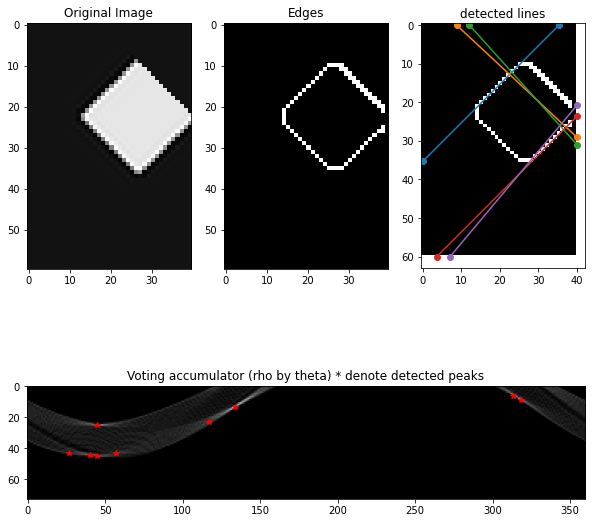

In [104]:
#------------run Hough transform on an image ------------------------------------------
# Diamond image
img = np.zeros([60, 40]) # synthetic image of a white square 
img[20:40,20:40] = np.ones([20, 20])
img = scipy.ndimage.rotate(img, angle=45, reshape = False)
#img = img + 1.0* np.random.rand(img.shape[0], img.shape[1])

# real image
#img = io.imread('/content/drive/MyDrive/Colab Notebooks/CAP 4410 - UG Computer Vision/data/house_1.png')
#img = change.rgb2gray(change.rgba2rgb(img))
#img = img.astype(float)  # need to change type from uint8 to float


edges, _ , _, _ = edge_detect(img, scale=1.5, threshold = 0.05)

# perform Hough transform
del_theta = 1
del_rho = 1
peaks, accumulator = Hough_transform (edges, 5, del_rho = del_rho, del_theta = del_theta)

print('Peaks found (rho, theta (radians), # votes):\n', peaks)
#-------------------Display---------------------------------------------------------------
fig, axs = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches (10, 10)

# Show input image
axs[0,0].imshow(img, cmap='gray')
axs[0,0].set_title ('Original Image')

axs[0,1].imshow (edges, cmap='gray')
axs[0,1].set_title ('Edges')

axs[0,2].imshow (edges, cmap='gray')
axs[0,2].set_title ('detected lines')

y_size, x_size = edges.shape
draw_lines (axs[0,2], x_size, y_size, peaks, 6)

# show the accumulator array spread across two plotting surfaces
gs = axs[1, 0].get_gridspec()
for ax in axs[1, :]:
    ax.remove()
axbig = fig.add_subplot(gs[1, :])
axbig.imshow (accumulator, cmap='gray')
axbig.set_title ('Voting accumulator (rho by theta) * denote detected peaks')
# plots the peaks
axbig.plot(peaks[:,1]*180/(del_theta*np.pi), peaks[:,0]/del_rho, 'r*');



Number of edge points found: 56
Accumulator (rho, theta) size is: (84, 360)
251 24
288 5
227 31
312 -8
225 31
314 -9
225 31
314 -9
224 31
315 -9
224 31
314 -9
225 31
314 -9
224 31
315 -9
225 31
314 -9
225 31
314 -9
224 31
315 -9
224 31
315 -9
222 31
317 -11
198 24
341 -31
161 5
18 -50
137 -8
42 -51
135 -9
44 -51
135 -9
44 -51
134 -9
45 -51
135 -9
45 -51
135 -9
44 -51
134 -9
45 -51
135 -9
44 -51
135 -9
44 -51
134 -9
45 -51
134 -9
45 -51
132 -11
47 -51
108 -31
71 -50
Peaks detected: (rho, theta, votes): 18 [[5, 161, 1.0], [5, 288, 1.0], [24, 198, 1.0], [24, 251, 1.0], [31, 222, 1.0], [31, 227, 1.0], [33, 42, 1.0], [33, 47, 1.0], [34, 18, 1.0], [34, 71, 1.0], [53, 108, 1.0], [53, 341, 1.0], [73, 132, 1.0], [73, 317, 1.0], [75, 135, 6.0], [75, 314, 6.0], [76, 137, 1.0], [76, 312, 1.0]]
75 2.356194490192345
75 5.480333851262194


Text(0.5, 1.0, 'Voting accumulator (rho by theta)')

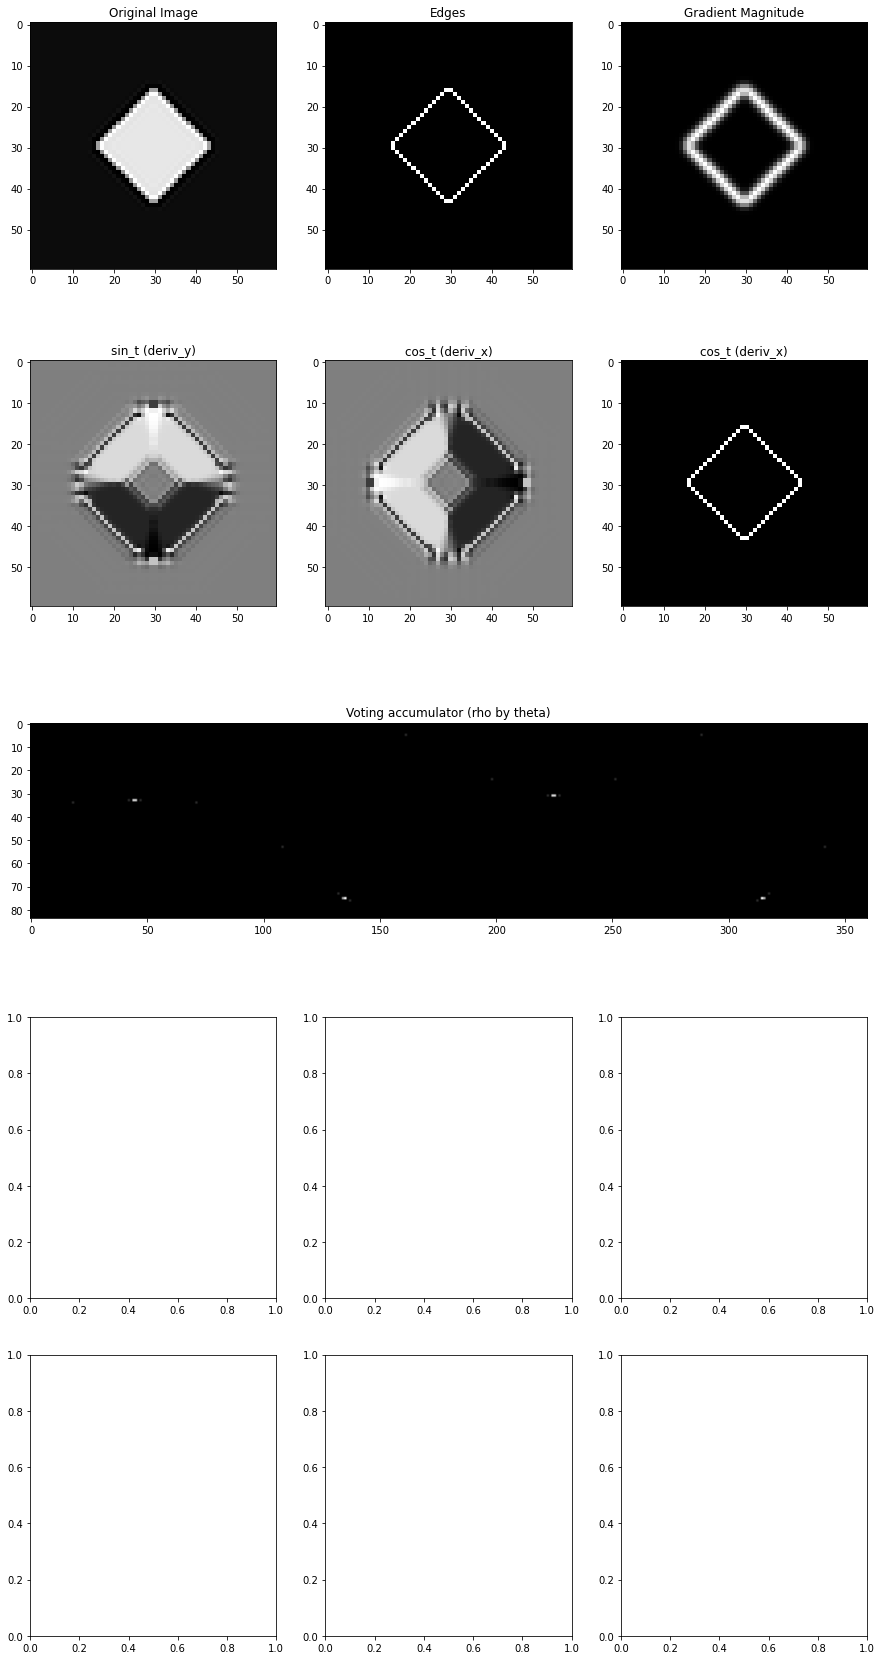

In [ ]:
#------------------------------------------------------------------
import scipy.ndimage 
import scipy.signal 

#------------Detect Edges------------------------------------------
img = np.zeros([60, 60]) # synthetic image of a white square 
img[20:40,20:40] = np.ones([20, 20])
img = scipy.ndimage.rotate(img, angle=45, reshape = False)
edges, mag, cos_t, sin_t = edge_detect(img, scale=1.0, threshold = 0.1)
edge_pixels = np.nonzero(edges)
print('Number of edge points found:', np.size(edge_pixels, 1))

#------------Setup accumulator------------------------------------------
# setup accumulator (rho, theta) space
# max for rho is the diagonal of the image
# theta ranges from -180 to 180
[R, C] = img.shape
rho_max = np.sqrt(R*R + C*C).astype(int)
accumulator = np.zeros ((rho_max, 360)) 
print('Accumulator (rho, theta) size is:', accumulator.shape)

#------------Hough vote------------------------------------------
# Each edge pixel votes for one point as determined based on the gradient estimate
for i in range (np.size(edge_pixels, 1)) :
    x = edge_pixels [1][i]
    y = edge_pixels [0][i]

    # the line is perpendicular to the gradient direction, and
    # gradient direction gives us the theta in the (rho, theta representation)
    theta = (180*(np.arctan2 (sin_t[y, x], cos_t[y, x]) + np.pi)/np.pi).astype(int)
    rho = (x * cos_t[y, x] + y * sin_t[y, x]).astype(int)
    print(theta, rho)
    accumulator[rho, theta] += 1

#------------Find peaks in accumulator------------------------------------------
peaks = []
for i in range (1, accumulator.shape[0]-1) :
    for j in range (1, accumulator.shape[1]-1) :
        if ((accumulator[i,j] > accumulator[i,j-1]) & 
            (accumulator[i,j] > accumulator[i,j+1]) &
            (accumulator[i,j] > accumulator[i-1,j]) &
            (accumulator[i,j] > accumulator[i+1,j]) &
            (accumulator[i,j] > accumulator[i-1,j-1]) &
            (accumulator[i,j] > accumulator[i+1,j+1]) &
            (accumulator[i,j] > accumulator[i-1,j+1]) &
            (accumulator[i,j] > accumulator[i+1,j-1])) :

            peaks.append([i, j, accumulator[i,j]])

print('Peaks detected: (rho, theta, votes):' , len(peaks), peaks)

#------------plot lines on top of edges ------------------------------------------

edge_overlap = edges.copy()

for i in range (len(peaks)) :
    if peaks[i][2] > 2 : # at least two votes
        rho = peaks [i][0]
        theta = peaks [i][1]*np.pi/180
        print (rho, theta)
        for y in range (edge_overlap.shape[0]) :
            x = (rho - y * np.sin(theta))/np.cos(theta)
            if (x > 0) & (x < edge_overlap.shape[1]) :
                edge_overlap [y, x.astype(int)] = 0.5


#--------------------Display ----------------------------------------
fig, axs = plt.subplots(nrows=5, ncols=3)
fig.set_size_inches (15, 30)

# Show input image
axs[0,0].imshow(img, cmap='gray')
axs[0,0].set_title ('Original Image')

axs[0,1].imshow (edges, cmap='gray')
axs[0,1].set_title ('Edges')

axs[0,2].imshow (mag, cmap='gray')
axs[0,2].set_title ('Gradient Magnitude')

axs[1,0].imshow(sin_t, cmap='gray')
axs[1,0].set_title ('sin_t (deriv_y)')

axs[1,1].imshow (cos_t, cmap='gray')
axs[1,1].set_title ('cos_t (deriv_x)')

axs[1,2].imshow (edge_overlap, cmap='gray')
axs[1,2].set_title ('cos_t (deriv_x)')

gs = axs[2, 0].get_gridspec()
for ax in axs[2, :]:
    ax.remove()
axbig = fig.add_subplot(gs[2, :])
axbig.imshow (accumulator, cmap='gray')
axbig.set_title ('Voting accumulator (rho by theta)')

